In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Car%20Price.csv')

In [3]:
data.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [5]:
data.isnull().sum()

Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
pd.value_counts(data.duplicated())

False    3577
True      763
dtype: int64

In [8]:
data.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [16]:
data['Brand'].value_counts()[::-1]

Kia                 1
Isuzu               1
Force               1
Daewoo              1
OpelCorsa           2
MG                  2
Jeep                3
Ambassador          4
Volvo               4
Land                5
Mitsubishi          6
Jaguar              6
Mercedes-Benz      35
Datsun             37
Fiat               37
BMW                39
Audi               60
Nissan             64
Skoda              68
Volkswagen        107
Renault           146
Chevrolet         188
Toyota            206
Ford              238
Honda             252
Tata              361
Mahindra          365
Hyundai           821
Maruti           1280
Name: Brand, dtype: int64

In [17]:
data.Model.value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: Model, Length: 1491, dtype: int64

In [18]:
data.Fuel.value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: Fuel, dtype: int64

In [19]:
data.Seller_Type.value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: Seller_Type, dtype: int64

In [20]:
data.Transmission.value_counts()

Manual       3892
Automatic     448
Name: Transmission, dtype: int64

In [21]:
data.Owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: Owner, dtype: int64

In [23]:
data.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [24]:
data.shape

(4340, 9)

In [26]:
data.replace({'Fuel': {'Petrol': 0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

In [88]:
data.replace({'Seller_Type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

In [89]:
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [90]:
data.replace({'Owner':{'First Owner':0,'Second Owner':1,
        'Third Owner': 2,'Fourth & Above Owner': 3,'Test Drive Car':4}},inplace=True)

## Define y(dependent or label or target variable) and X(independent or features or attribute Variable)

In [91]:
y=data.Selling_Price

In [92]:
y.shape

(4340,)

In [93]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_Price, Length: 4340, dtype: int64

In [94]:
np.dtype(data.Selling_Price)

dtype('int64')

In [95]:
x=data.drop(['Brand','Model','Selling_Price'],axis=1)

In [96]:
x.head()

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1


In [97]:
x.shape

(4340, 6)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [100]:
x_train.shape,x_test.shape

((3255, 6), (1085, 6))

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
model=LinearRegression()

In [103]:
model.fit(x_train,y_train)

LinearRegression()

In [104]:
y_predict=model.predict(x_test)

In [105]:
y_predict.shape

(1085,)

In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [107]:
mean_absolute_error(y_test,y_predict)

221395.8692453853

In [108]:
mean_squared_error(y_test,y_predict)

175316330195.38394

In [110]:
r2_score(y_test,y_predict)*100

39.20593818196589

Here r2_score is low so we need to take other parameter for car price prediction to get more accuracy value

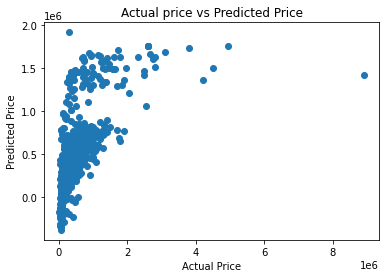

In [116]:
plt.scatter(y_test,y_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual price vs Predicted Price")
plt.show()

In [117]:
data_new=data.sample(2)

In [118]:
data_new

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
1891,Datsun,Datsun GO Plus A,2015,315000,45000,0,0,0,1
2567,Mahindra,Mahindra XUV500 W8 2WD,2015,750000,70000,1,0,0,0


In [119]:
X_new=data_new.drop(['Brand','Model','Selling_Price'],axis=1)

In [120]:
y_predict_new=model.predict(X_new)

In [121]:
y_predict_new

array([344574.4342317 , 579422.80437355])